# Student Performance Indicator


## Life cycle of Machine learning Project

#### Understanding the Problem Statement

- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages


#### Importing numpy,pandas,seaborn,matplotlib,warnings library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

#### Import CSV data as panda dataframe 

In [3]:
df = pd.read_csv("data/stud.csv")


#### Display Top 5 Dataset 

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [5]:
df.shape

(1000, 8)

## 2.2 Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,- associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- Observation : There is no missing value in these dataset..

#### 3.2  Check Duplicates Value

In [7]:
df.duplicated().sum()

0

- Observation : There is no duplicated value present in these dataset

#### 3.3 Check Datatype 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Observation : There are 5 columns contain categorical data and 3 columns contain numerical data

In [9]:
# Check for duplicate records and remove them if any exist
df_cleaned = df.drop_duplicates()
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing duplicates: {df_cleaned.shape}")
print(f"Number of duplicate records removed: {df.shape[0] - df_cleaned.shape[0]}")

Original dataset shape: (1000, 8)
Dataset shape after removing duplicates: (1000, 8)
Number of duplicate records removed: 0


#

#### 3.4 Checking the no if Uniques values of each columns

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of Dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

- From the above descriptions numnerical data , all means are very close to each other - between 66 to 68
- All Standard Deviation are very close to - 14.6 to 15.19
- While there is minimum score is 0 and maximum is 100

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3.7 Exploring Data

In [13]:
print('Categories in the Gender Varible:   ',end=' ')
print(df['gender'].unique())

print('Categories in the race_ethnicity Varible:   ',end=' ')
print(df['race_ethnicity'].unique())

print('Categories in the parental_level_of_education Varible:   ',end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in the lunch Varible:   ',end=' ')
print(df['lunch'].unique())
    
print('Categories in the test_preparation_course Varible:   ',end=' ')
print(df['test_preparation_course'].unique())




Categories in the Gender Varible:    ['female' 'male']
Categories in the race_ethnicity Varible:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the parental_level_of_education Varible:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the lunch Varible:    ['standard' 'free/reduced']
Categories in the test_preparation_course Varible:    ['none' 'completed']


In [14]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features and {} categorical features'.format(len(numeric_features), len(categorical_features)))


We have 3 numerical features and 5 categorical features


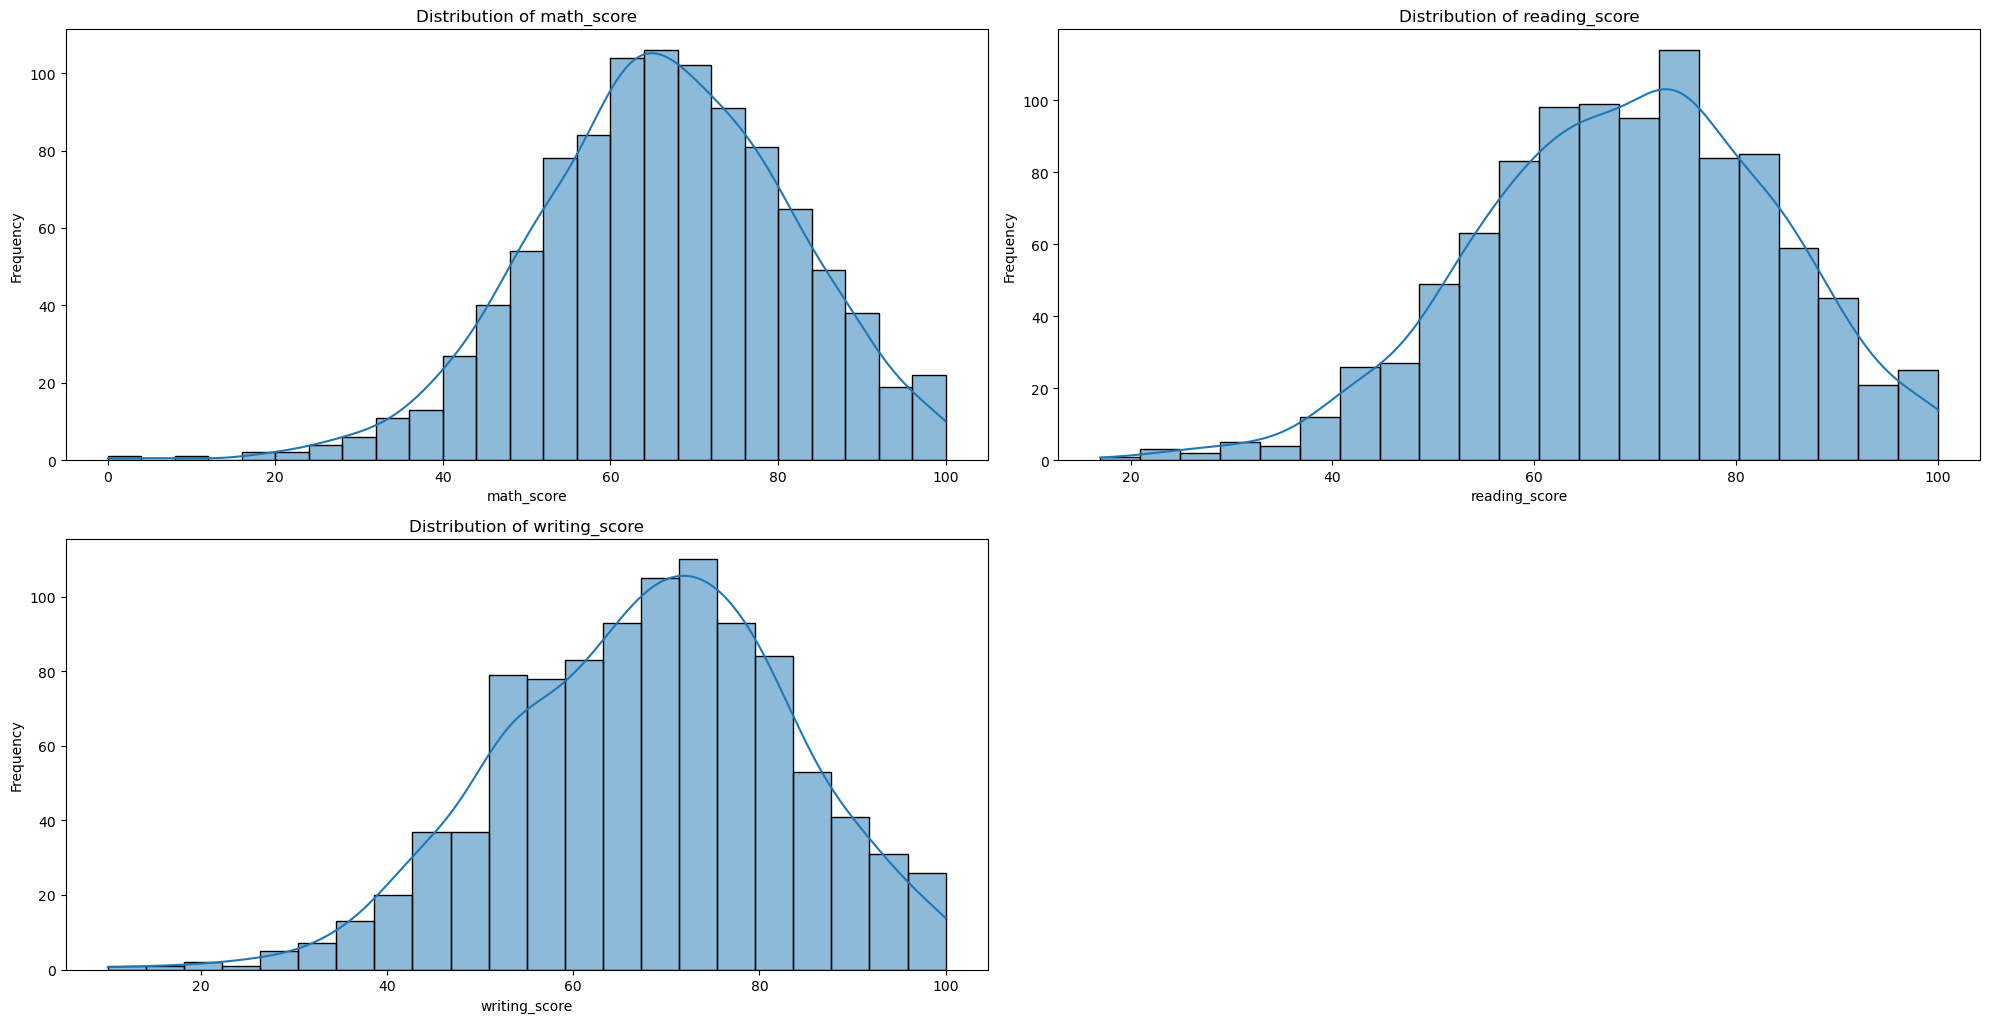

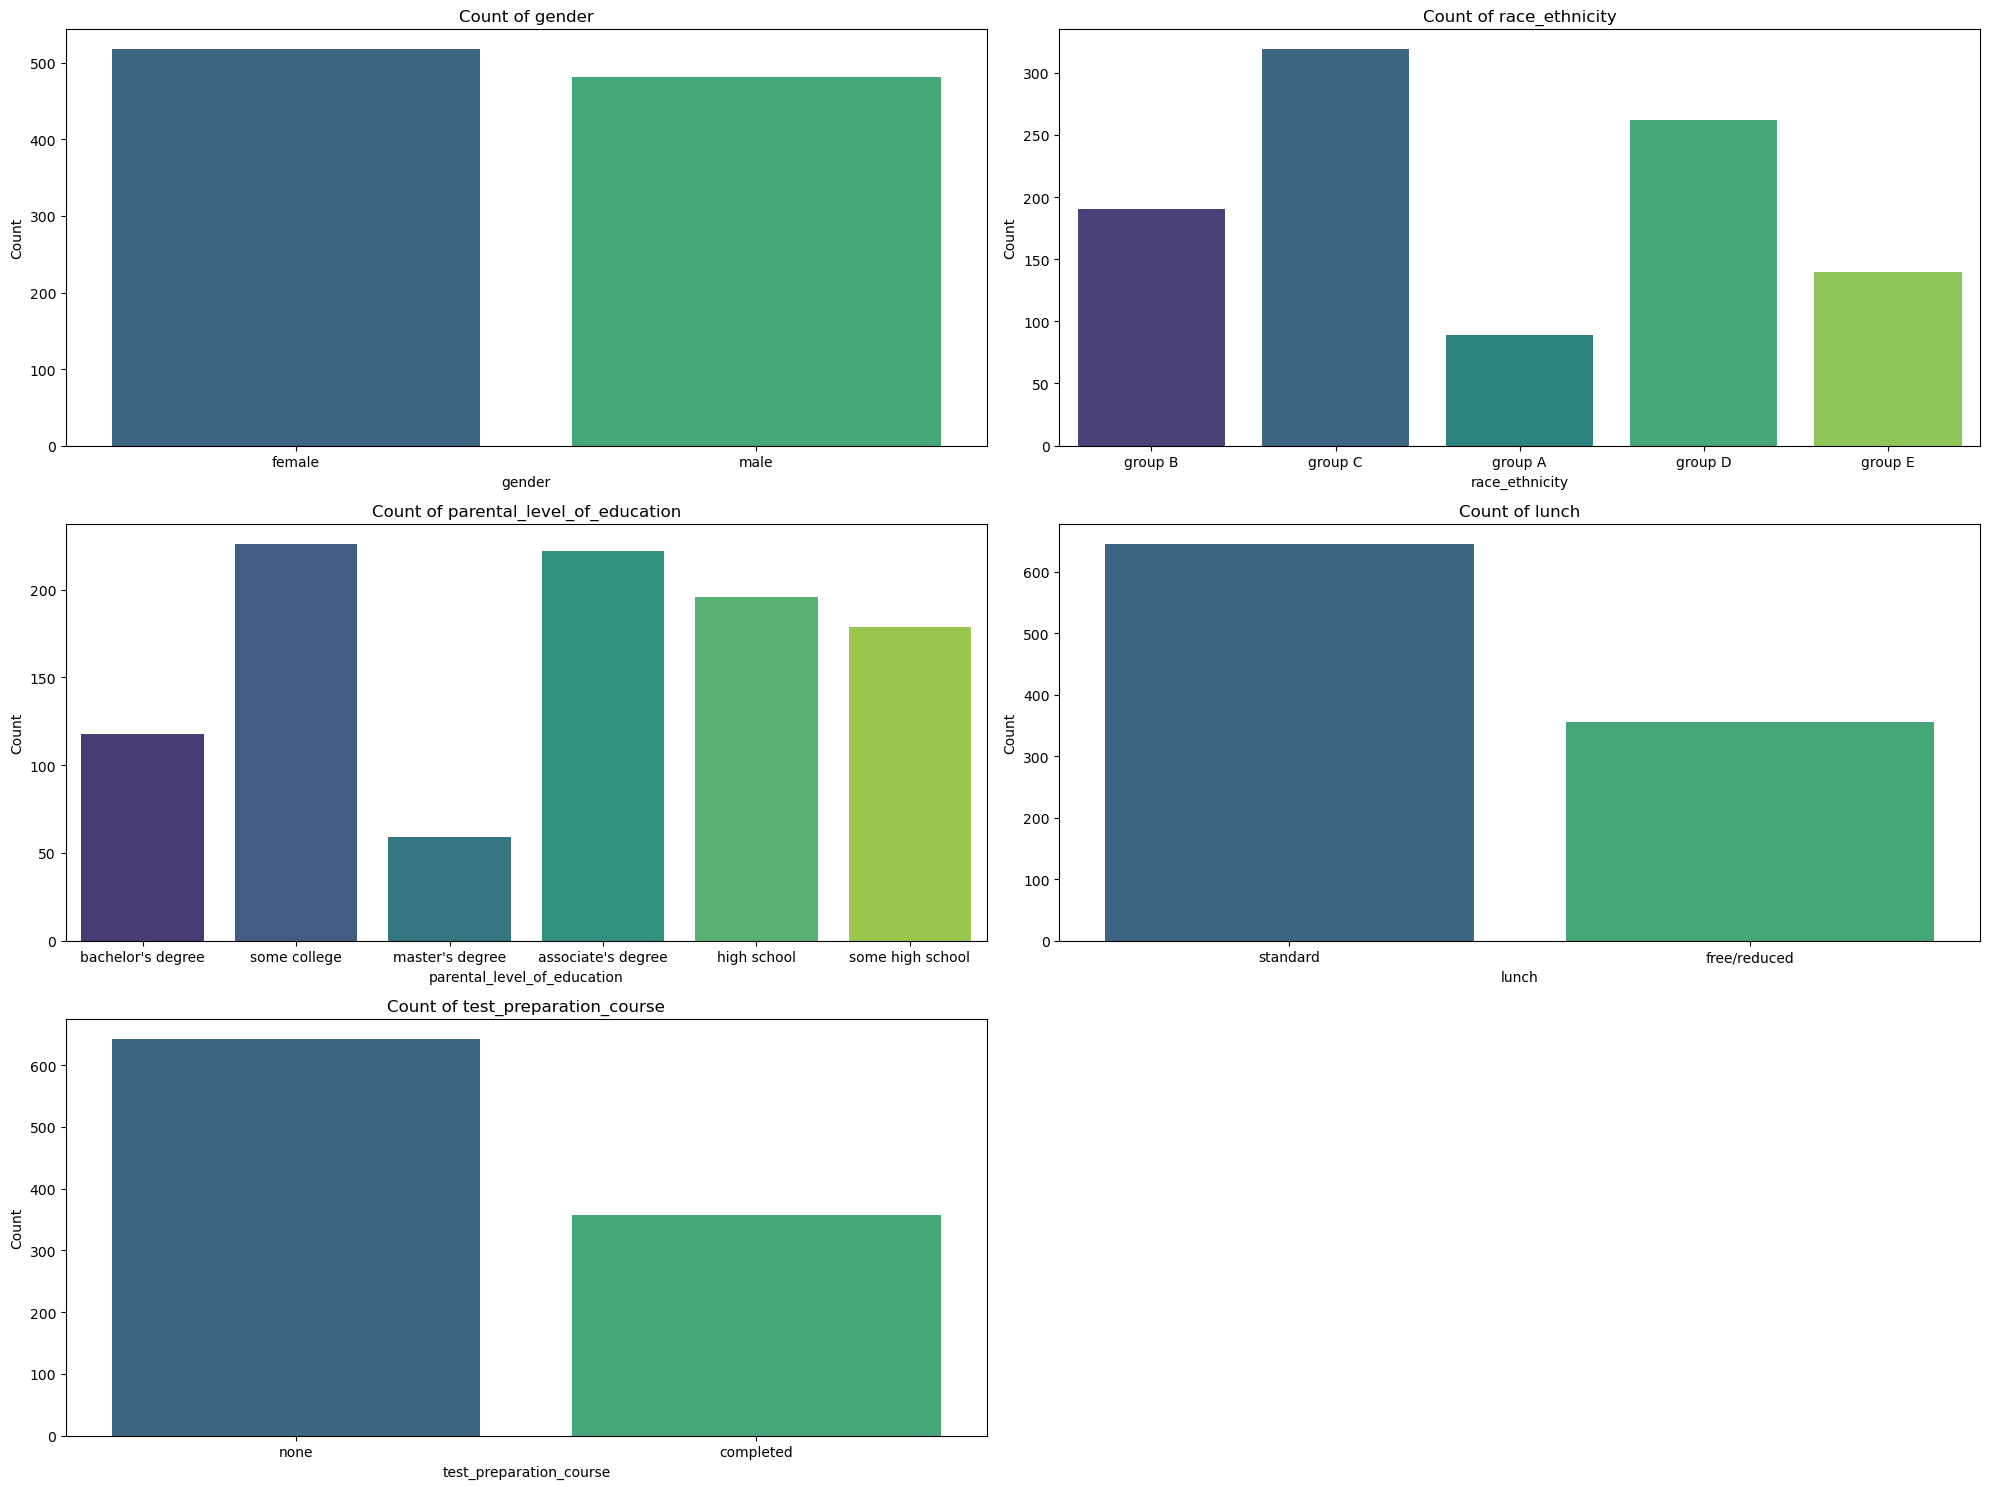

In [15]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Plotting numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3.8 Adding Columns for "Total Score" and "Average" 

In [17]:
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in math: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [ ]:
reading_less = df[df['reading_score'] <= 20]['average'].count()
writing_less = df[df['writing_score'] <= 20]['average'].count()
math_less = df[df['math_score'] <= 20]['average'].count()


print(f"Number of students with less than 20 marks in reading: {reading_less}")
print(f"Number of students with less than 20 marks in writing: {writing_less}")
print(f"Number of students with less than 20 marks in math: {math_less}")

Number of students with less than full marks in reading: 1
Number of students with less than full marks in writing: 3
Number of students with less than full marks in math: 4


##### Insights

- From above values we get student have perfrom worst in Maths
- Bes perfromace in Reading Section

#### 4. Exploring Data (Visualization)

##### 4.1 Visualize average score of distribution to make some conslusion 

- histrogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histogram and KDE


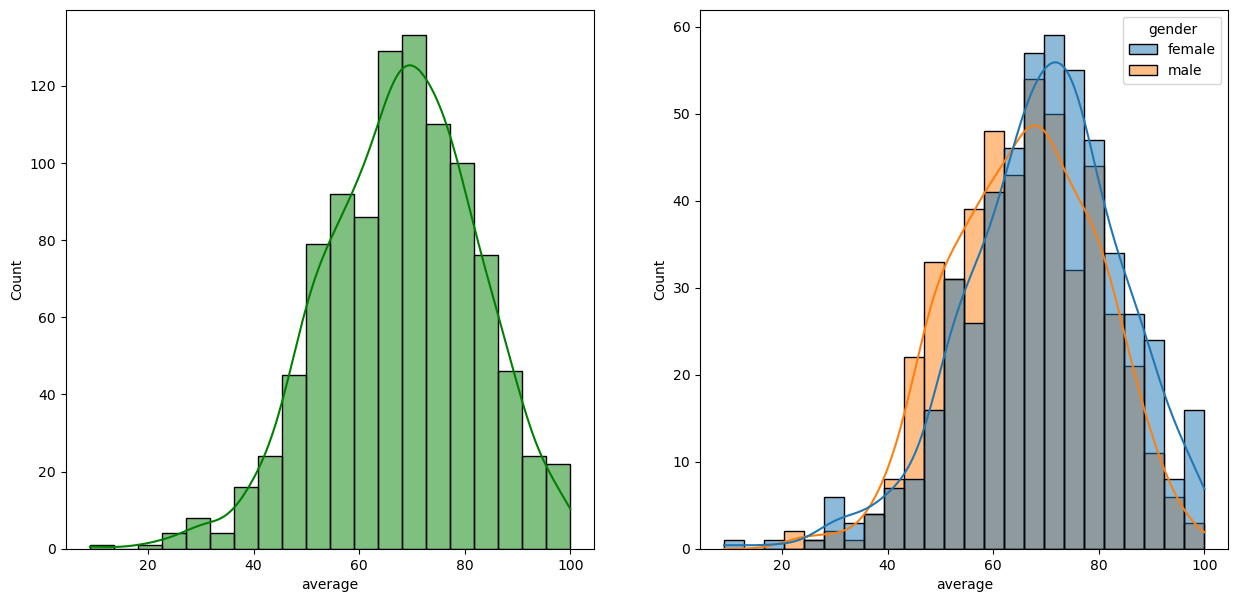

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

- Observation : Female students perfrom well in Exam as compared to man

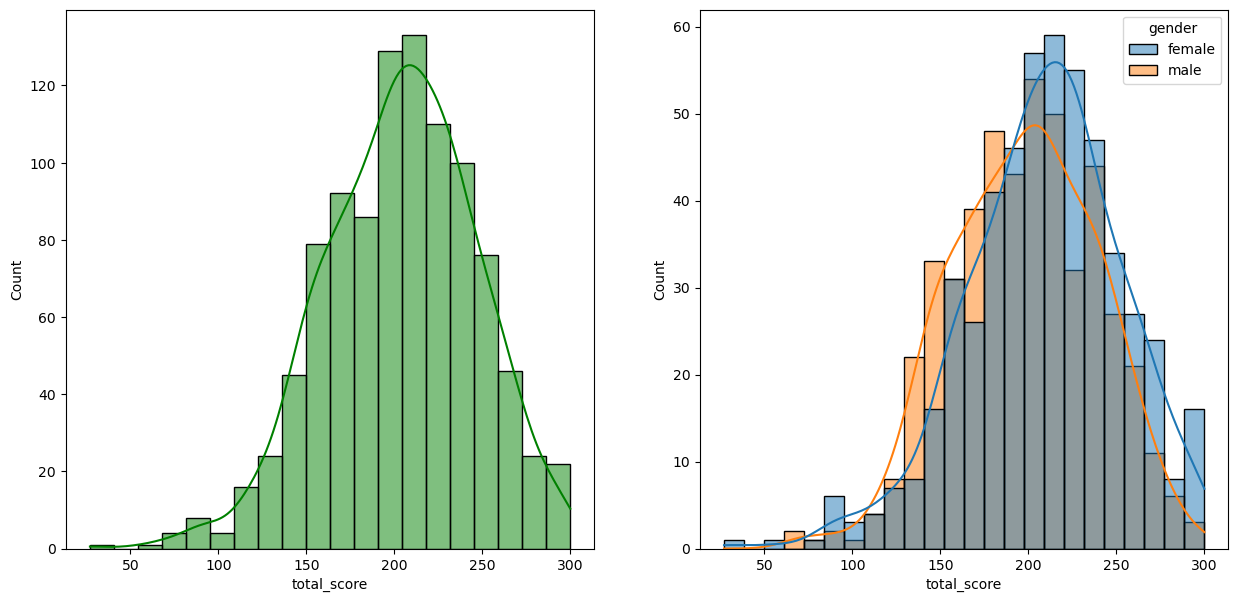

In [21]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

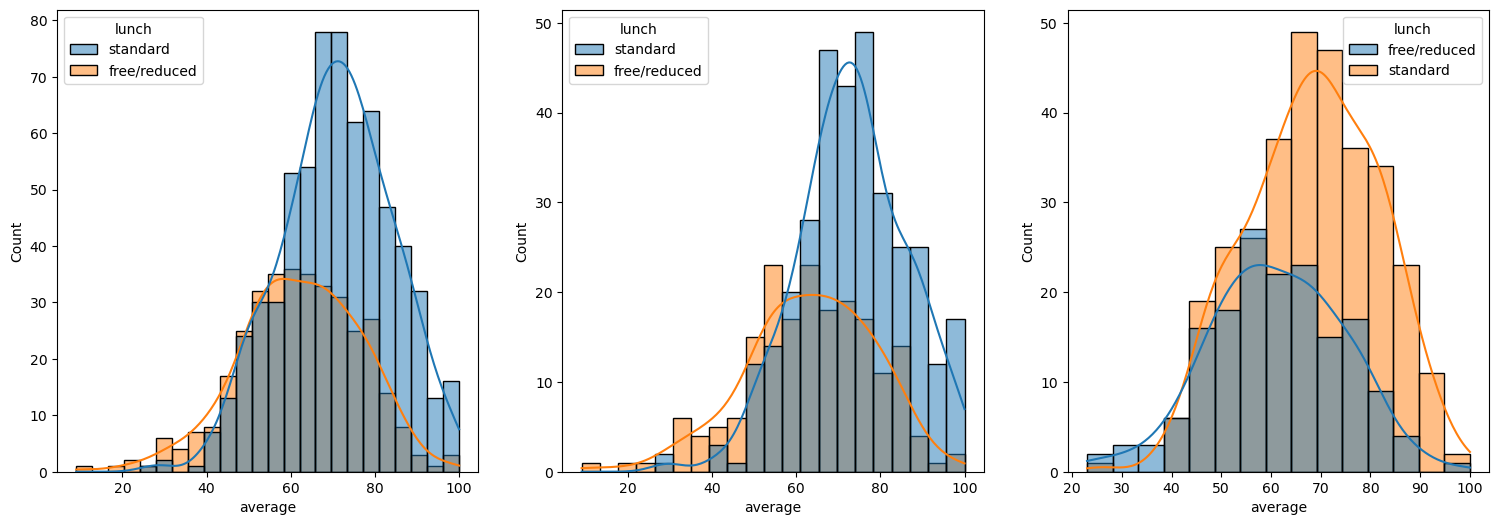

In [22]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

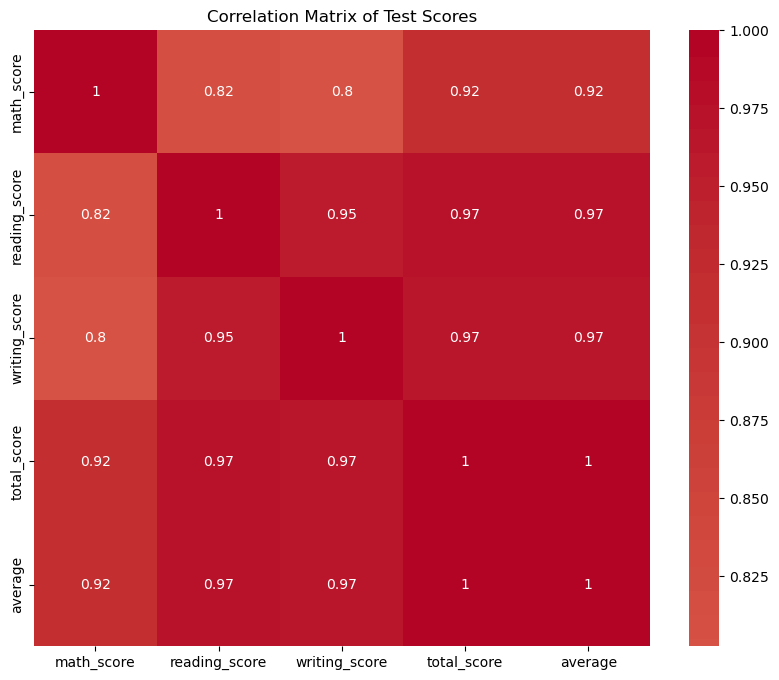

In [23]:
# 1. Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['math_score', 'reading_score', 'writing_score', 'total_score', 'average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Test Scores')
plt.show()